In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
train_df = pd.read_csv('train_data.csv')
train_df.head(10)

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1
5,5,6,0,1,0.3500,0.016510,0,0,1,0.0,1,0,0,0,0,1,0
6,6,7,0,1,0.6750,0.101229,1,0,0,0.0,1,0,0,0,0,0,1
7,7,8,0,1,0.0250,0.041136,0,0,1,0.4,0,0,1,0,0,0,1
8,8,9,1,0,0.3375,0.021731,0,0,1,0.2,1,0,0,0,0,0,1
9,9,10,1,0,0.1750,0.058694,0,1,0,0.1,1,0,0,0,1,0,0


In [3]:
train_df = train_df.drop(columns=['Unnamed: 0', 'PassengerId'])

Набор данных состоит из 15 столбцов, таких как sex (пол), fare (плата за проезд), p_class (класс каюты), family_size (размер семьи), и т. д. Главным признаком, который мы и должны предсказать в соревновании, является survived (выжил пассажир или нет).

Дополнительный анализ показал, что находящиеся в браке люди имеют больший шанс на то, чтобы быть спасенными с корабля. Поэтому были добавлены еще 4 столбца, переименованные из Name (Имя), которые обозначают мужчин и женщин в зависимости от того, были они женаты или нет (Mr, Mrs, Mister, Miss).

In [4]:
predictors = ['Age', 'Fare']
outcome = 'Survived'


new_record = train_df.loc[0:0, predictors]
X = train_df.loc[1:, predictors]
y = train_df.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X, y)
knn.predict(new_record)
print(knn.predict_proba(new_record))

[[0.76 0.24]]


In [5]:
nbrs = knn.kneighbors(new_record)
nbr_df = pd.DataFrame({'Age': X.iloc[nbrs[1][0], 0], 
                         'Fare': X.iloc[nbrs[1][0], 1],
                         'Survived': y.iloc[nbrs[1][0]]})
nbr_df

,Age,Fare,Survived
320,0.27500,0.014151,0
376,0.27500,0.014151,1
212,0.27500,0.014151,0
60,0.27500,0.014110,0
553,0.27500,0.014102,1
243,0.27500,0.013907,0
478,0.27500,0.014680,0
141,0.27500,0.015127,1
289,0.27500,0.015127,1
554,0.27500,0.015176,1


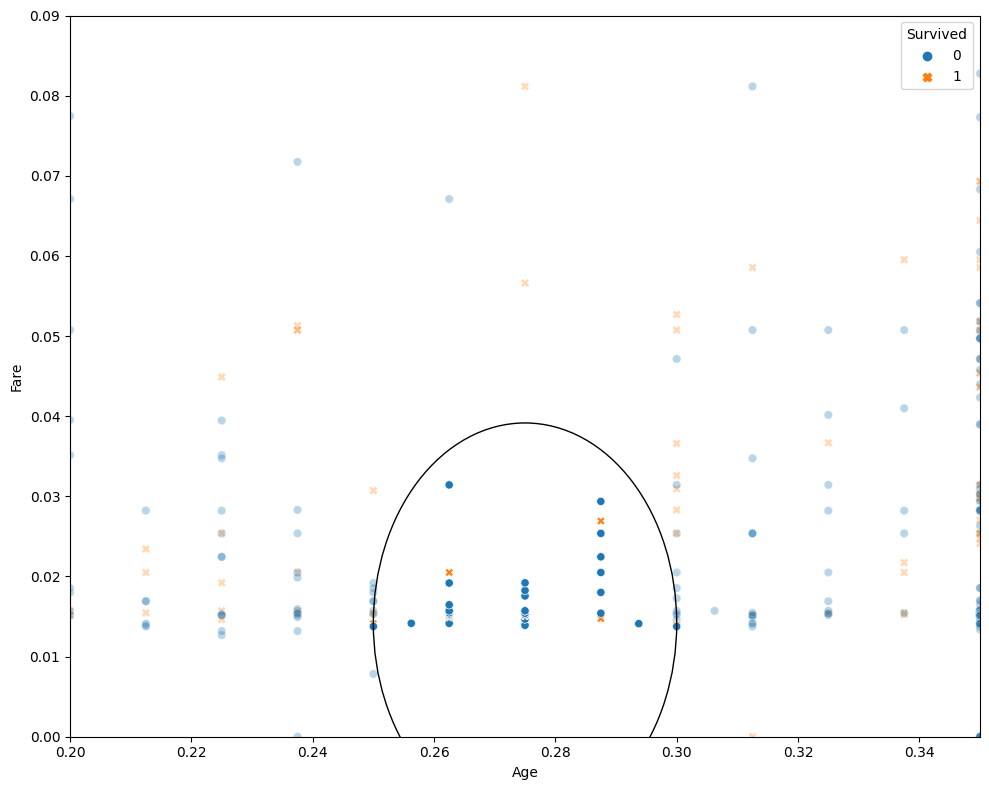

In [8]:
nbrs = knn.kneighbors(new_record)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x = 'Age', y = 'Fare', style = 'Survived', 
                hue='Survived', data=train_df, alpha=0.3, ax=ax)
sns.scatterplot(x = 'Age', y = 'Fare', style = 'Survived', 
                hue = 'Survived', 
                data = pd.concat([train_df.loc[0:0, :], train_df.loc[nbrs[1][0] + 1,:]]), 
                ax = ax, legend=False)
ellipse = Ellipse(xy = new_record.values[0], 
                  width = 2 * maxDistance, height = 2 * maxDistance,
                  edgecolor = 'black', fc = 'None', lw = 1)
ax.add_patch(ellipse)
ax.set_xlim(.2, .35)
ax.set_ylim(0, .09)

plt.tight_layout()
plt.show()

In [12]:
predictors = ['Sex', 'Age', 'Fare', 'Pclass_1',
 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']
outcome = 'Survived'

X = train_df[predictors]
y = train_df[outcome]
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X, y)

train_df['survived_score'] = kNN.predict_proba(X)[:, 1]
train_df['survived_score'].describe()

count    792.000000
mean       0.395455
std        0.370710
min        0.000000
25%        0.000000
50%        0.200000
75%        0.800000
max        1.000000
Name: survived_score, dtype: float64

In [13]:
train_df.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3,survived_score
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1,0.4
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0,1.0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1,0.6
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1,1.0
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1,0.0
